# 第11回 ニューラルネットワークその1: 基礎的事項

いつものように右上の「Remix」ボタンを押して自分用の複製を作成すれば、各セルを「Shift+Enter」で実行しながら読むことができます

編集を行なった後は、Windowsでは「Ctrl+s」、Macでは「Cmd+s」で保存することができます

# マルチパーセプトロン (y=x^3の回帰)

In [1]:
using Flux
using Flux: Data.DataLoader
using Flux: onehotbatch, onecold, crossentropy
using Flux: @epochs
using Plots
using Statistics

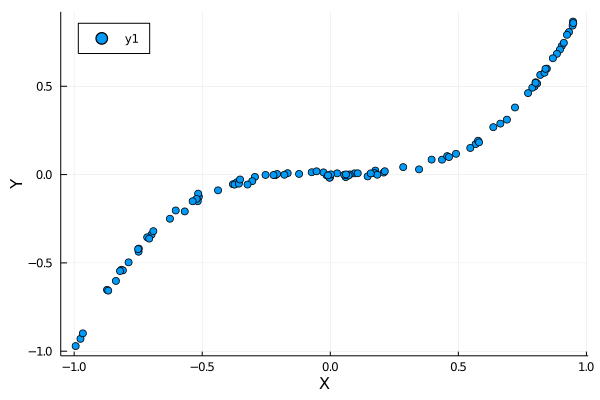

In [1]:
# データの作成
N = 100
X = 2.0.*(rand(N).-0.5)
Y = X.^3 .+ 0.01 .* randn(N)
#Y = sin.( 2 .* pi .* X) .+ 0.01 .* randn(N)
scatter(X, Y, legend=:topleft)
xlabel!("X"); ylabel!("Y")

In [1]:
# create mini-batches
x_train = zeros(Float32, 1, N)
y_train = zeros(Float32, 1, N)
for n = 1:N
  x_train[1, n] = X[n]
  y_train[1, n] = Y[n]
end
train_data = DataLoader((x_train, y_train), batchsize=N)

DataLoader{Tuple{Array{Float32,2},Array{Float32,2}}}((Float32[-0.748494 0.0601464 … 0.463441 -0.352295], Float32[-0.436799 -0.0142495 … 0.0992427 -0.0277756]), 100, 100, true, 100, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  91, 92, 93, 94, 95, 96, 97, 98, 99, 100], false)

In [1]:
# Define model
model = Chain(Dense(1,10,relu),
              Dense(10,10,relu),
              Dense(10,10,relu),
              Dense(10,1))

Chain(Dense(1, 10, relu), Dense(10, 10, relu), Dense(10, 10, relu), Dense(10, 1))

In [1]:
# Define loss function and optimizer
loss(x, y) = Flux.mse(model(x), y)
opt = ADAM()
ps = Flux.params(model)

Params([Float32[-0.0653035; -0.441464; … ; 0.486076; -0.464077], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.175346 0.103586 … -0.348263 0.187664; 0.402826 0.120195 … -0.0581996 0.130141; … ; -0.0465284 -0.405056 … -0.455252 0.104886; -0.361681 -0.415974 … 0.388388 0.18547], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.439566 0.547445 … -0.174674 -0.18245; 0.18167 -0.185708 … 0.225353 0.350572; … ; -0.112308 -0.423202 … 0.125027 -0.342553; 0.182492 -0.451702 … -0.539697 0.256097], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.662192 -0.578542 … -0.596768 -0.575316], Float32[0.0]])

In [1]:
# train the model
@epochs 3000 Flux.train!(loss, ps, train_data, opt)

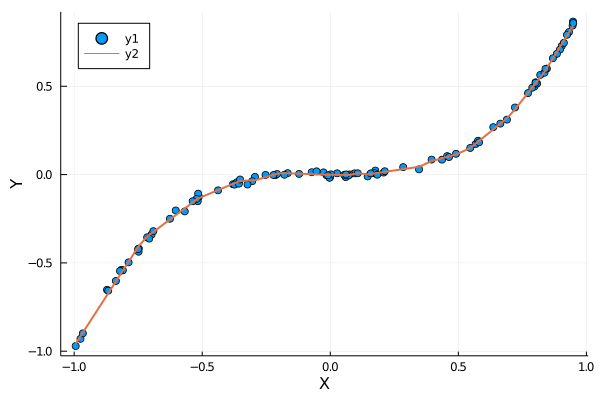

In [1]:
scatter(X, Y)
x = sort(x_train, dims=2)
plot!(x[:], model(x)[:], linewidth=2, legend=:topleft)
xlabel!("X"); ylabel!("Y")

# やってみよう

1つ目：y=x^3だけでなくもっと難しい関数形も表現できているか確認してください (例えばsin(x)とか)

2つ目：ノイズのサイズを大きくしてみて過学習(ノイズへの過適合)が生じるか見た目で良いので確認してください